Note:
In datset variable 16 is twice hence renamed last 16 as 16_1

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)

# Dataset Analysis

In [2]:
df = pd.read_excel("Credit Risk Assignment.xlsx", 'data')
df.head()

,user_id,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,...,var 13,var 14,var 15,var 16,var 16_1,var 17,var 18,var 19,var 20,target
0,5d3234dd35,14,63,33,127749.15,123991.60,0.00,2,0,16500.00,...,4467.62,3,0,2,S10,694,3,16,14,0
1,5d5d501c2d,-1,71,63,5662084.25,4544216.78,43703.05,3,2,146640.00,...,20620.09,0,0,0,S10,728,17,442,322,0
2,7398c73c70,-1,61,42,132319.64,129126.18,0.00,0,0,0.00,...,437.63,0,0,0,S10,17,1,2,2,0
3,8701e42c66,-1,3,57,154385.33,148055.44,0.00,0,0,0.00,...,29798.73,0,0,0,S01,0,0,0,0,0
4,8a62b13fec,40,225,83,945415.75,1008052.87,40575.28,1,1,16034.41,...,5832.02,0,0,0,S10,640,6,41,11,0


In [3]:
df.isnull().sum() # Null value inspection

user_id     0
var 1       0
var 2       0
var 3       0
var 4       0
var 5       0
var 6       0
var 7       0
var 8       0
var 9       0
var 10      0
var 11      0
var 12      0
var 13      0
var 14      0
var 15      0
var 16      0
var 16_1    0
var 17      0
var 18      0
var 19      0
var 20      0
target      0
dtype: int64

## Total no. of defaulted customers ("1") & Total no. of non-defaulted Customers("0")

In [4]:
df['target'].value_counts() 

0    746
1     56
Name: target, dtype: int64

## Total Customers 

In [5]:
len(df['target'])

802

## Current default rate

In [6]:
print("Current default rate:",56/802*100)

Current default rate: 6.982543640897755


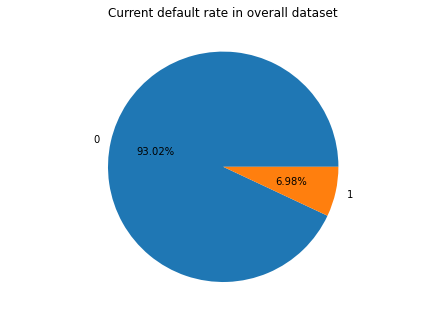

In [7]:
temp = df['target'].value_counts()
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.axis('equal')
ax.pie(temp.values, labels= temp.index, autopct= '%.2f%%')
plt.title('Current default rate in overall dataset')
plt.show()

### Data is highly imbalanced as defaulted percentage is low

## 2. Top 3 variables who has highest risk splitting power

In [8]:
df.describe()# Inspecting the data 

,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,var 10,...,var 12,var 13,var 14,var 15,var 16,var 17,var 18,var 19,var 20,target
count,802.000000,802.000000,802.000000,8.020000e+02,8.020000e+02,802.000000,802.000000,802.000000,8.020000e+02,802.000000,...,8.020000e+02,802.000000,802.000000,802.0,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,8.582294,74.679551,34.937656,3.004100e+05,2.826430e+05,7297.737020,1.066085,1.908978,1.748206e+04,6731.507344,...,1.219950e+05,11467.407943,0.100998,0.0,0.433915,627.970075,14.754364,104.680798,76.544888,0.069825
std,20.313187,63.699617,55.650426,5.516301e+05,5.032137e+05,17541.799506,1.451461,3.978148,1.143698e+05,21266.981947,...,2.373635e+05,35495.174931,0.472488,0.0,1.333800,211.977007,16.910376,123.644623,95.440387,0.255012
min,-1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,...,1.506000e+03,-42886.000000,0.000000,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,29.000000,11.000000,6.143314e+04,5.558076e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,2.796047e+04,1032.687500,0.000000,0.0,0.000000,656.000000,4.000000,32.000000,17.000000,0.000000
50%,-1.000000,59.000000,23.000000,1.293030e+05,1.205579e+05,1150.000000,1.000000,0.000000,1.545000e+03,0.000000,...,5.416269e+04,3472.840000,0.000000,0.0,0.000000,682.000000,10.000000,68.000000,49.000000,0.000000
75%,6.000000,101.000000,42.000000,3.063655e+05,2.944839e+05,8940.835000,2.000000,2.000000,9.346500e+03,6819.762500,...,1.180966e+05,9621.330000,0.000000,0.0,0.000000,721.000000,19.000000,128.750000,95.000000,0.000000
max,99.000000,446.000000,1013.000000,5.662084e+06,4.650230e+06,329098.240000,9.000000,34.000000,2.690392e+06,385260.380000,...,3.323064e+06,633710.080000,5.000000,0.0,17.000000,848.000000,188.000000,1170.000000,851.000000,1.000000


#### - Checking Correlation

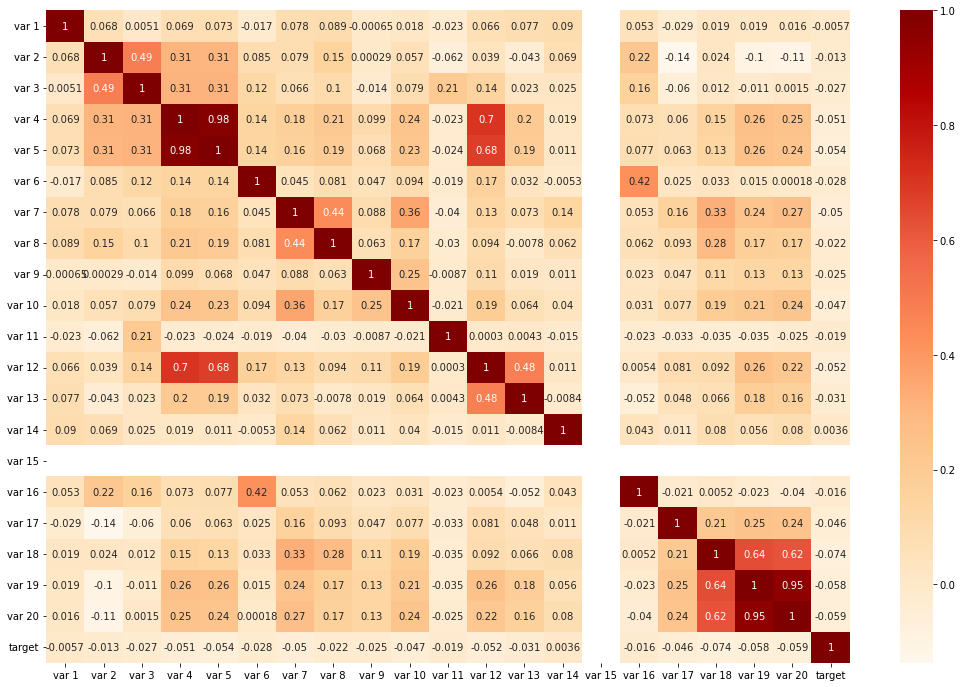

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap="OrRd",annot=True)
plt.show() # Checking Correlation

###### - Variable 4 and 5 are highly corelated, hence either of the variable can be dropped


###### - Variable 19 and 20 are highly corelated, hence either of the variable can be dropped

###### -For Var15 all values are 0, hence can be dropped

In [10]:
df= df.drop(['var 15', 'var 5', 'var 20'], axis=1) #dropping the columns


### Categorical variable analysis to check the top variables having highest risk splitting power

In [11]:
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]

In [12]:
def catplot(data,x,y,title): # Creating the reusable function for visualization .
    
    
    g_df = data.groupby(x)[y].value_counts(normalize=True)
    g_df = g_df.mul(100)
    g_df = g_df.rename('percent').reset_index()

    g_df2 = data.groupby(x)[y].value_counts()
    g_df2 = g_df2.rename('count').reset_index()
    g_df =  pd.concat([g_df, g_df2['count']], axis=1)
    
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=g_df,aspect=30/8.27)
    g.ax.set_ylim(0,100)

    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    return g_df

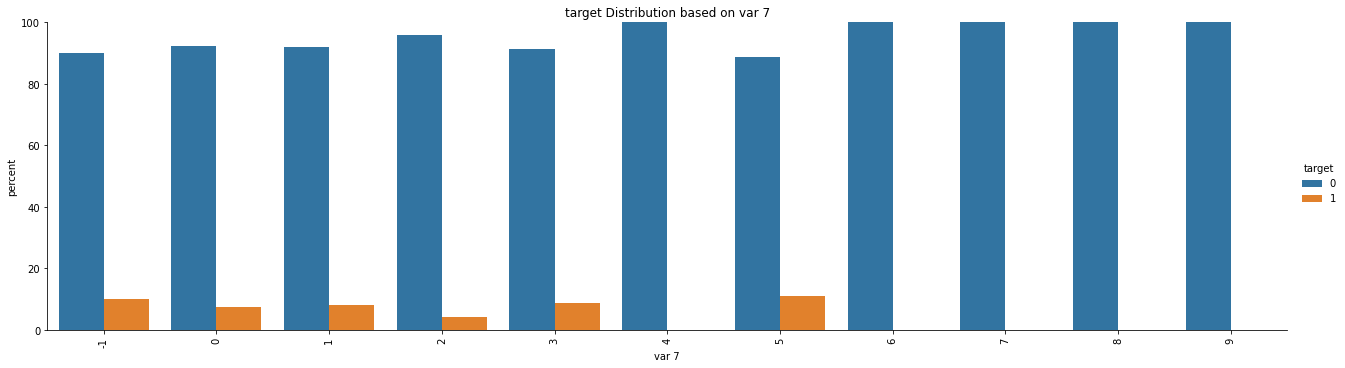

,var 7,target,percent,count
0,-1,0,90.000000,9
1,-1,1,10.000000,1
2,0,0,92.458101,331
3,0,1,7.541899,27
4,1,0,92.035398,208
5,1,1,7.964602,18
6,2,0,95.744681,90
7,2,1,4.255319,4
8,3,0,91.228070,52
9,3,1,8.771930,5


In [13]:
catplot(df,'var 7','target','target Distribution based on var 7')

###### -In reference to "var 7" for value 4,6,7,8,9 there are no defaulters but number of users are low which is because of higly imbalance data

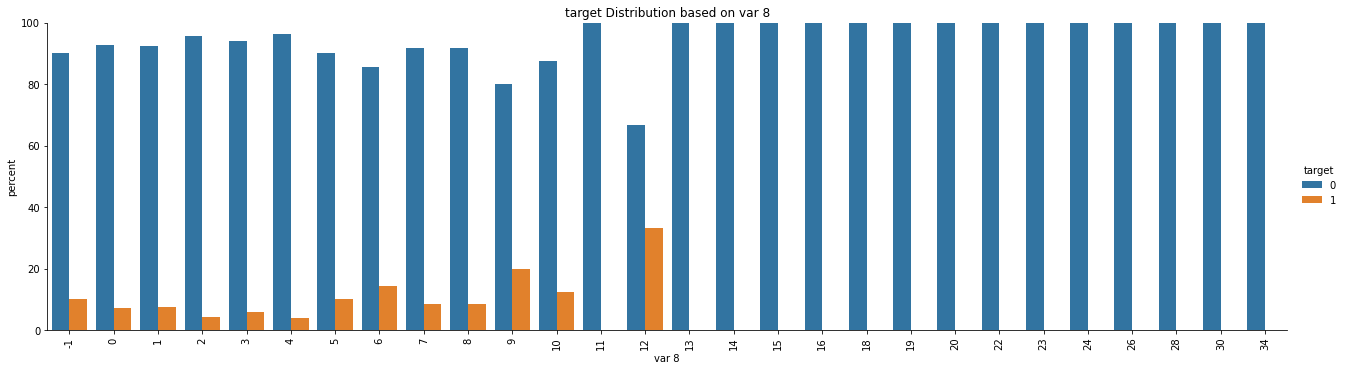

,var 8,target,percent,count
0,-1,0,90.000000,9
1,-1,1,10.000000,1
2,0,0,92.740047,396
3,0,1,7.259953,31
4,1,0,92.436975,110
5,1,1,7.563025,9
6,2,0,95.774648,68
7,2,1,4.225352,3
8,3,0,94.117647,48
9,3,1,5.882353,3


In [14]:
catplot(df,'var 8','target','target Distribution based on var 8')



###### - In reference to "var 8" for value 11 and 13 to 34 there are no defaulters but number of users are low as data is imbalance.

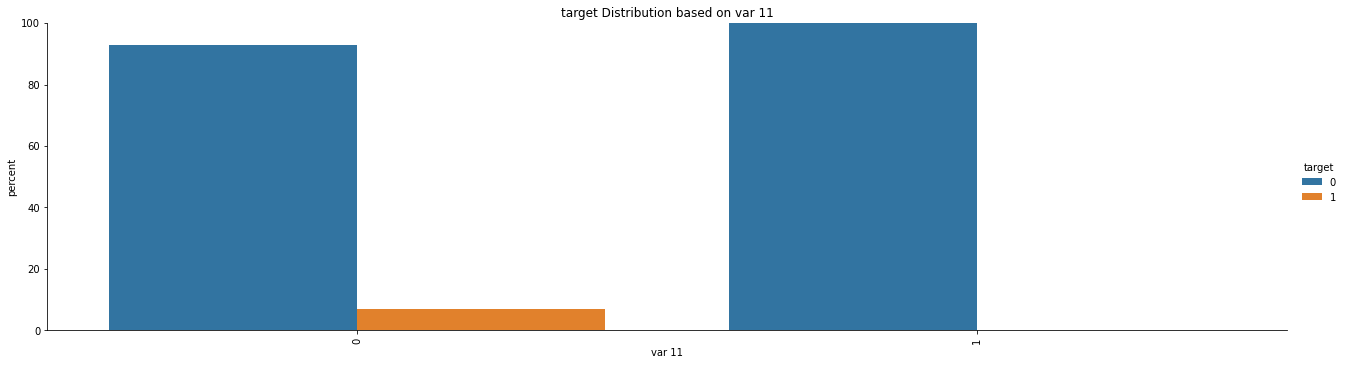

,var 11,target,percent,count
0,0,0,92.982456,742
1,0,1,7.017544,56
2,1,0,100.000000,4


In [15]:
catplot(df,'var 11','target','target Distribution based on var 11')

###### - In reference to "var 11" for value 1 there are no defaulters but number of users under 1 are very low.

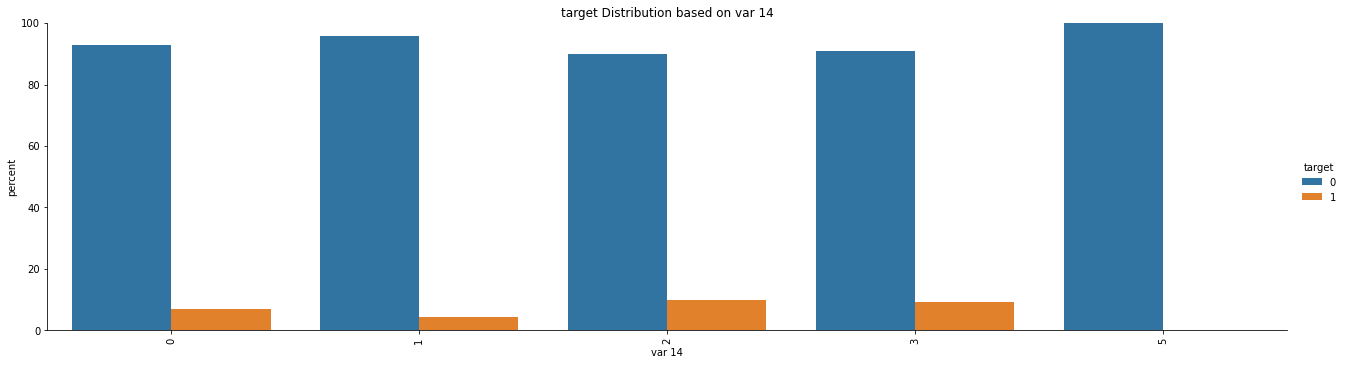

,var 14,target,percent,count
0,0,0,92.998679,704
1,0,1,7.001321,53
2,1,0,95.652174,22
3,1,1,4.347826,1
4,2,0,90.000000,9
5,2,1,10.000000,1
6,3,0,90.909091,10
7,3,1,9.090909,1
8,5,0,100.000000,1


In [16]:

catplot(df,'var 14','target','target Distribution based on var 14')

###### In reference to "var 14" for value 5 there are no defaulters but only 1 user is under 5

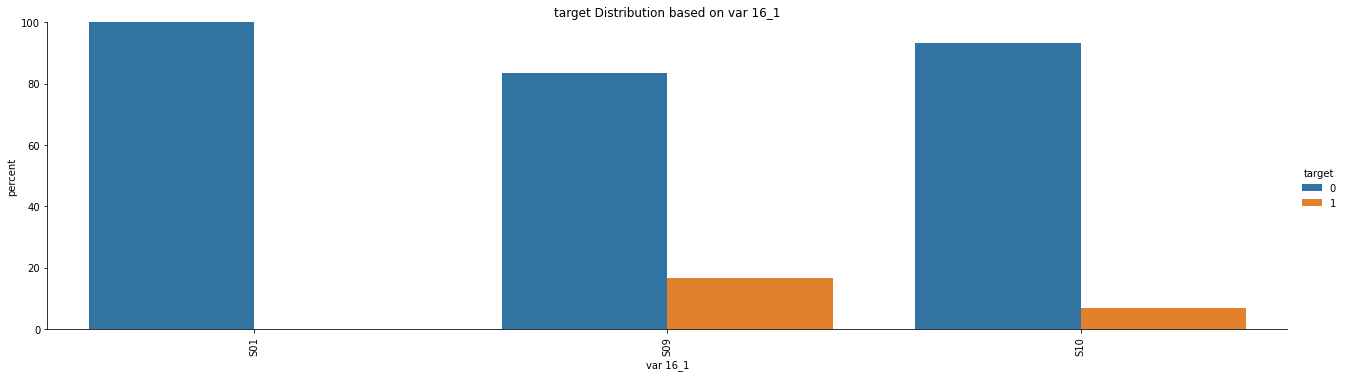

,var 16_1,target,percent,count
0,S01,0,100.000000,8
1,S09,0,83.333333,25
2,S09,1,16.666667,5
3,S10,0,93.324607,713
4,S10,1,6.675393,51


In [17]:
catplot(df,'var 16_1','target','target Distribution based on var 16_1')

###### -In reference to "var 16" for value 3 and 5 to 17 there are no defaulters

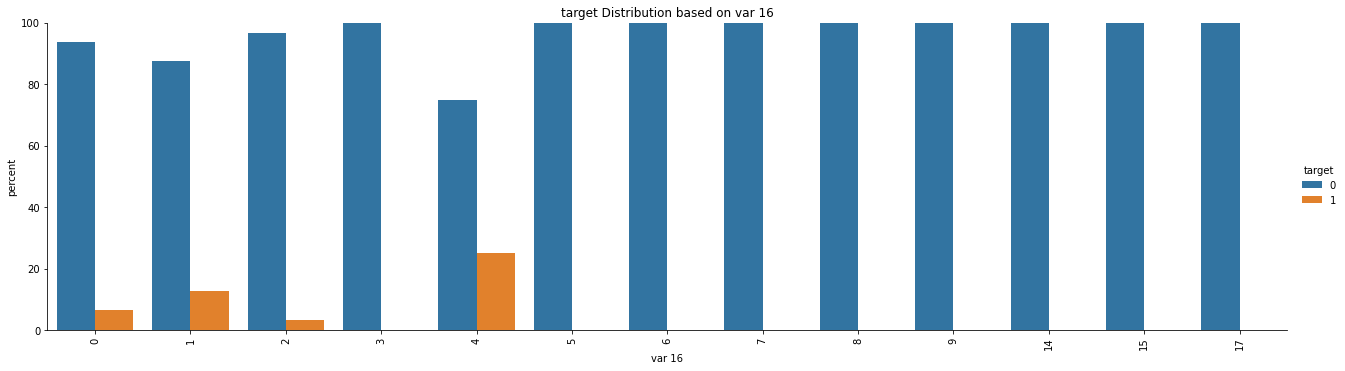

,var 16,target,percent,count
0,0,0,93.620415,587
1,0,1,6.379585,40
2,1,0,87.387387,97
3,1,1,12.612613,14
4,2,0,96.774194,30
5,2,1,3.225806,1
6,3,0,100.000000,14
7,4,0,75.000000,3
8,4,1,25.000000,1
9,5,0,100.000000,7


In [18]:
catplot(df,'var 16','target','target Distribution based on var 16')

###### -In reference to "var 16_1" for S01 there are no defaulters but only 1 user is under 5.

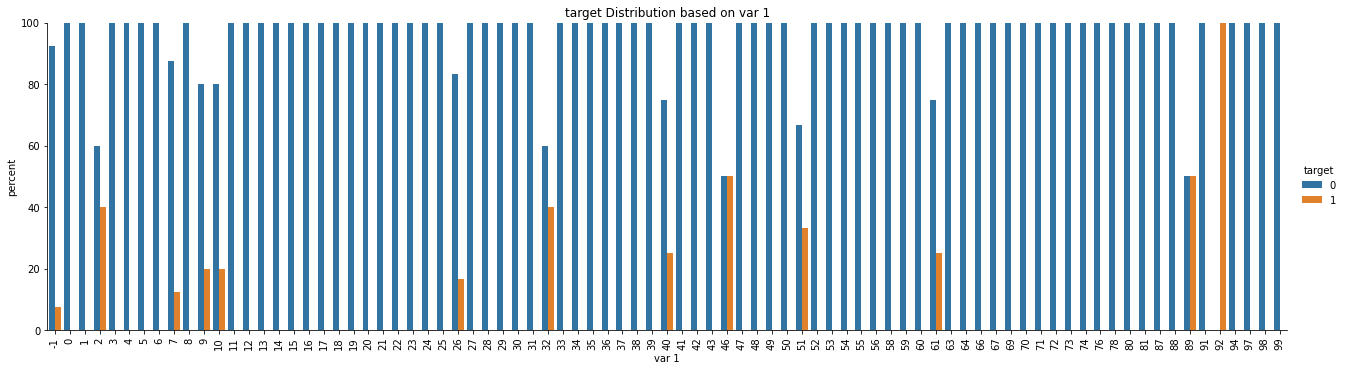

,var 1,target,percent,count
0,-1,0,92.405063,511
1,-1,1,7.594937,42
2,0,0,100.000000,3
3,1,0,100.000000,13
4,2,0,60.000000,3
5,2,1,40.000000,2
6,3,0,100.000000,10
7,4,0,100.000000,7
8,5,0,100.000000,6
9,6,0,100.000000,13


In [19]:
catplot(df,'var 1','target','target Distribution based on var 1')

###### -In reference to "var 1" for only -1,2,7,9,10,26,32,40,46,51,61,89,92 are defaulters and for others there are no defaulters

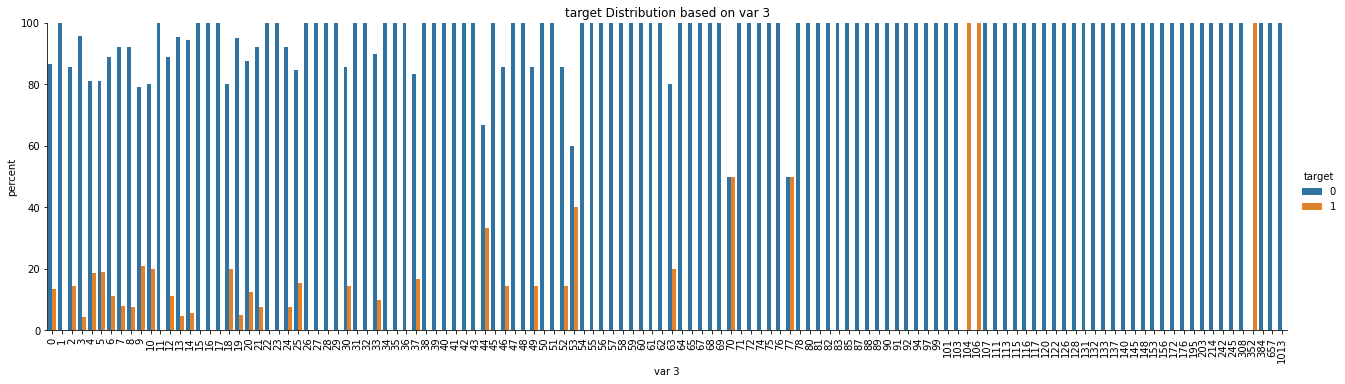

,var 3,target,percent,count
0,0,0,86.666667,13
1,0,1,13.333333,2
2,1,0,100.000000,12
3,2,0,85.714286,12
4,2,1,14.285714,2
5,3,0,95.833333,23
6,3,1,4.166667,1
7,4,0,81.250000,13
8,4,1,18.750000,3
9,5,0,80.952381,17


In [20]:
catplot(df,'var 3','target','target Distribution based on var 3')


### - Numeric variable analysis to check the top variables having highest risk splitting power.

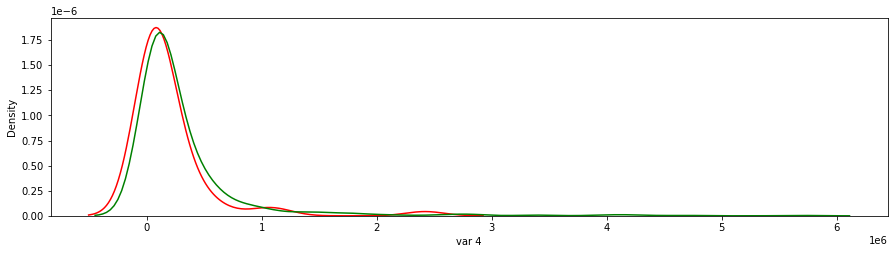

In [25]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 4'], hist = False, label ="Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 4'], hist = False, label ="Non Defaulter", color = 'green')
plt.show()

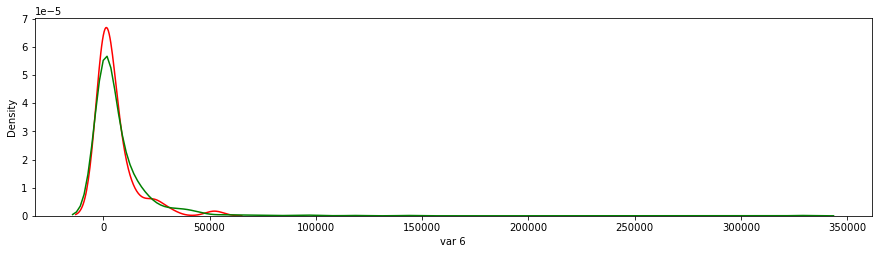

In [29]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 6'], hist = False, label='Defaulter', color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 6'], hist = False, label='Non Defaulter', color = 'green')
plt.show()

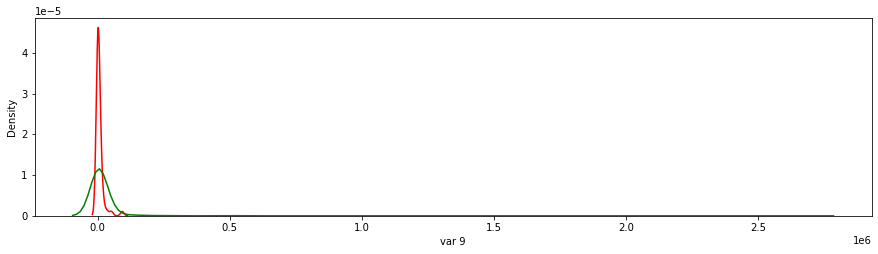

In [42]:
f, axs = plt.subplots(figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 9'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 9'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

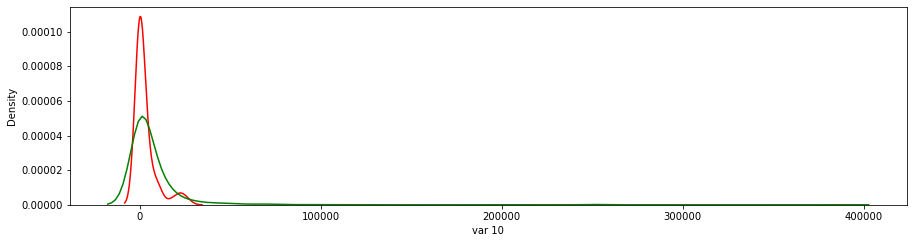

In [24]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 10'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 10'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

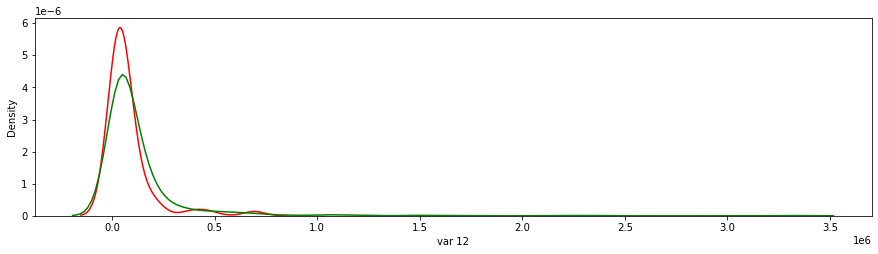

In [25]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 12'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 12'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

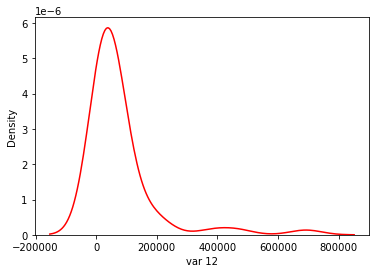

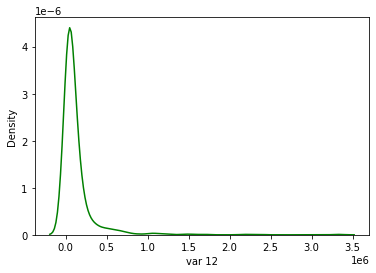

In [26]:
sns.distplot(df_1['var 12'], hist = False, label = "Defaulter", color = 'red')
plt.show()
sns.distplot(df_0['var 12'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

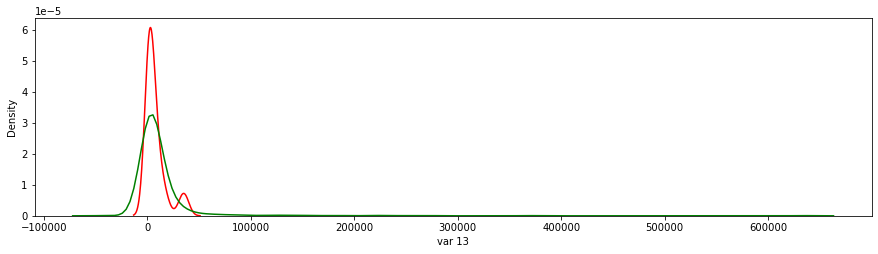

In [27]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 13'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 13'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

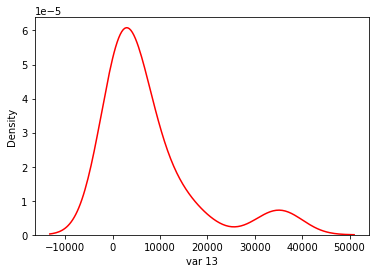

In [28]:
sns.distplot(df_1['var 13'], hist = False, label = "Defaulter", color = 'red')
plt.show()

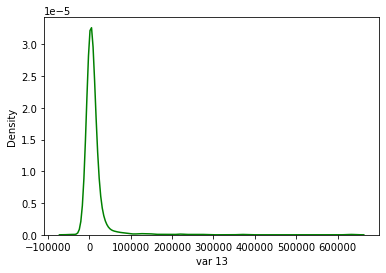

In [29]:
sns.distplot(df_0['var 13'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

###### - for var 13 above 40000 all are non defaulter

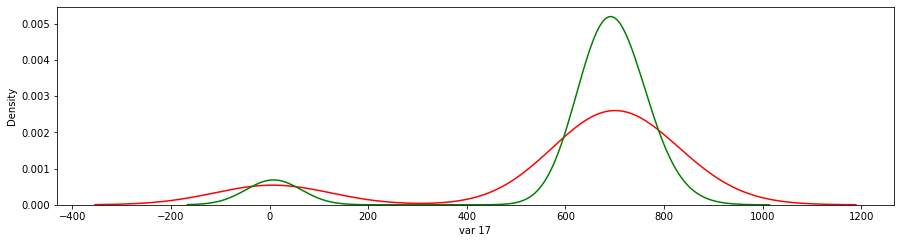

In [30]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 17'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 17'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

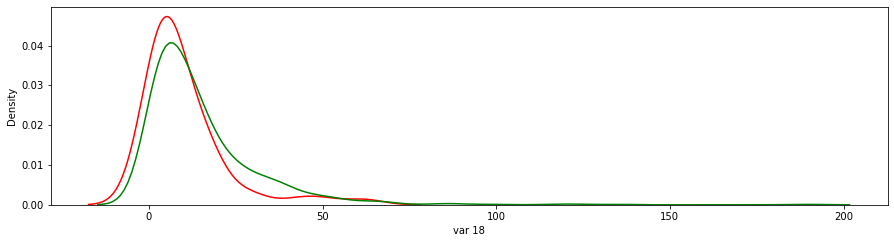

In [31]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 18'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 18'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

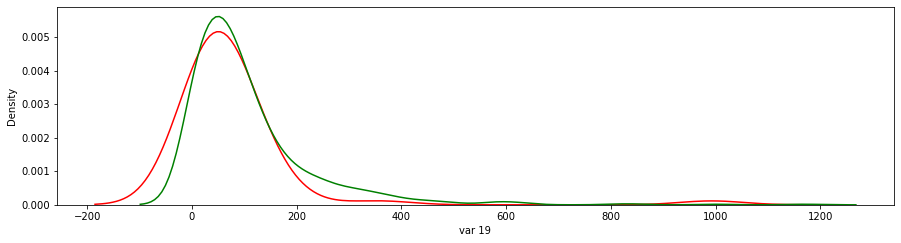

In [32]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 19'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 19'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

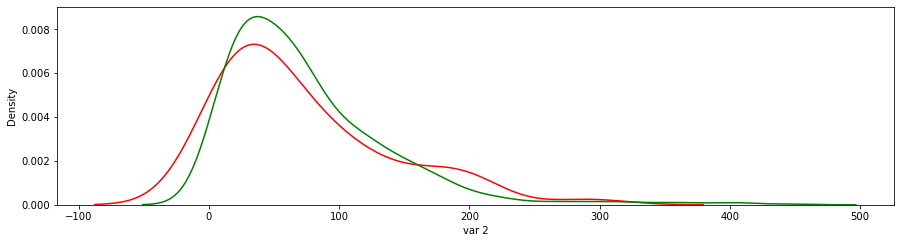

In [33]:
f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(2,1,1)
sns.distplot(df_1['var 2'], hist = False, label = "Defaulter", color = 'red')
plt.subplot(2,1,1)
sns.distplot(df_0['var 2'], hist = False, label = "Non Defaulter", color = 'green')
plt.show()

###### Summary:

#After analysing the variables with respect to the target(defaulter/non-defaulter) variables,top 3 variables are as per below:

#-var7, var16_1 and var 13

#-above variables are selected based on the counts available for defaulters and non defaulter

#-for var 7 users are having more than 3 points are non defaulters

#-for var 16_1 users are having S01 are non defaulters

#-for var 13 there above 40000 all are non defaulter


### Optimizing credit policy to reduce the risk by 30%

###### based on top 3 variables dropping the entries having below condition:
    
var 13 less than 40000 and var 16_1 in S09, S10

### As per the variable analysis below strategy can be applied to reduce the risk:
    
Users for "var 8" having value as 12,9 should be declined as for these values not defaulters are more in comparision to defaulter.

Users for "var 16" having value as 4 should be declined as for this values defaulters are more in comparision to non defaulter.

Users for "var 1" having value as 2,9,10,32,40,46,51,61,89,92 should be declined as for these values defaulters are more.

In [112]:
df =df[(~df["var 8"].isin([12,9]))& (df["var 16"] != 4) &(~df["var 1"].isin([2,9,10,32,40,46,51,61, 89, 92]))]

In [113]:
df

,user_id,var 1,var 2,var 3,var 4,var 6,var 7,var 8,var 9,var 10,var 11,var 12,var 13,var 14,var 16_1,var 16,var 17,var 18,var 19,target
0,5d3234dd35,14,63,33,127749.15,0.00,2,0,16500.0,33000.0,0,29841.00,4467.62,3,2,S10,694,3,16,0
1,5d5d501c2d,-1,71,63,5662084.25,43703.05,3,2,146640.0,73320.0,0,3323064.16,20620.09,0,0,S10,728,17,442,0
2,7398c73c70,-1,61,42,132319.64,0.00,0,0,0.0,0.0,0,14367.34,437.63,0,0,S10,17,1,2,0
3,8701e42c66,-1,3,57,154385.33,0.00,0,0,0.0,0.0,1,124275.68,29798.73,0,0,S01,0,0,0,0
5,3d21b5bb66,-1,81,40,85985.43,0.33,1,3,0.0,7279.5,0,16313.00,6916.89,0,0,S10,735,12,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,05b54d7726,58,45,26,50075.86,32000.00,3,10,1000.0,-1.0,0,75036.50,21158.63,0,2,S10,708,9,17,0
798,ac70f7ccc5,81,145,43,370240.95,0.00,0,0,0.0,0.0,0,120121.09,4777.64,0,4,S10,651,4,48,0
799,9ea754e2d6,-1,53,30,76654.10,0.00,0,0,0.0,0.0,0,36566.29,1765.33,0,0,S10,818,12,131,0
800,c619779f56,-1,61,36,426453.09,1166.67,0,0,0.0,0.0,0,45340.99,9652.36,0,0,S10,640,10,51,0


In [114]:
print("Total number of defaulted customer:", len(df[df['target']==1]))
print("Total number of non defaulted Customers:",len(df[df['target']==0]))

Total number of defaulted customer: 42
Total number of non defaulted Customers: 717


In [115]:
print("Current default rate=", len(df[df['target']==1])/len(df['target'])*100)

Current default rate= 5.533596837944664
